In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [5]:
#Loading Data
df=pd.read_csv("retail_sales_dataset.csv")

In [6]:
#Displaying first 5 rows of Data
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
#Checking Data shape
df.shape

(1000, 9)

In [8]:
#Checking for duplcated values
df.duplicated().any()

False

In [9]:
#Checking for null values
df.isnull().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [10]:
#Descriptive analysis
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
#Mode of the Data
df.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [13]:
#Standardizing the Date column to actual Date format
df['Date'] = pd.to_datetime(df['Date'])

In [41]:
#Sorting Data by date for time series analysis
df.sort_values(by='Date').head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Age group,Day of Week,Quarter of the Year
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,1,2023,40-49,6,1
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,1,2023,40-49,6,1
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,1,2023,30-39,6,1
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,1,2023,10-19,0,1
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,1,2023,10-19,0,1


In [43]:
#Creating Month column
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Month'].head(12)

0     11
1      2
2      1
3      5
4      5
5      4
6      3
7      2
8     12
9     10
10     2
11    10
Name: Month, dtype: int32

In [44]:
df['Year']=pd.to_datetime(df['Date']).dt.year
df['Year'].head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: Year, dtype: int32

Text(0.5, 1.0, 'Sales by Month')

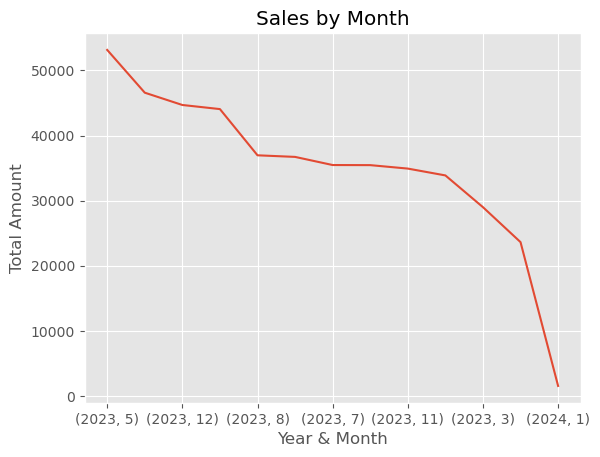

In [17]:
ax=df.groupby(['Year','Month'])['Total Amount'].sum().sort_values(ascending=False).plot()
ax.set_xlabel('Year & Month')
ax.set_ylabel('Total Amount')
ax.set_title('Sales by Month')
              

In [18]:
#Creating Age group column
age_bins = [10, 20, 30, 40, 50, 60] 
age_labels = ['10-19', '20-29','30-39', '40-49','50+']
df['Age group'] = pd.cut(df['Age'],bins=age_bins,labels=age_labels,right=True)

In [19]:
#Total Amount spent by Age group
df.groupby('Age group')['Total Amount'].sum()

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64

In [20]:
#Total Amount spent by grouping Age group and Product Category
grouped_data=df.groupby(['Age group','Product Category'])['Total Amount'].sum().reset_index()

Text(0.5, 1.0, 'Spending Pattern by Age group based on Product Category')

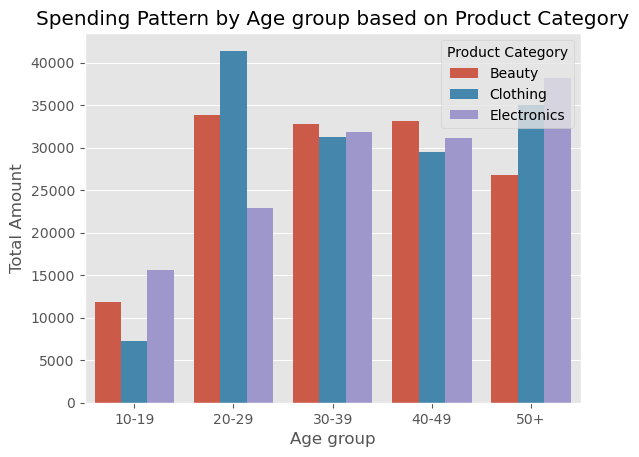

In [21]:
ax=sns.barplot(x='Age group',y='Total Amount',hue='Product Category', data=grouped_data)
ax.set_title('Spending Pattern by Age group based on Product Category')

In [22]:
df['Day of Week']=pd.to_datetime(df['Date']).dt.dayofweek

In [23]:
#Product sales by days of the week
dow_sales=df.groupby(['Day of Week','Product Category'])['Total Amount'].sum().reset_index()

Text(0.5, 1.0, 'Sales by Day of the Week')

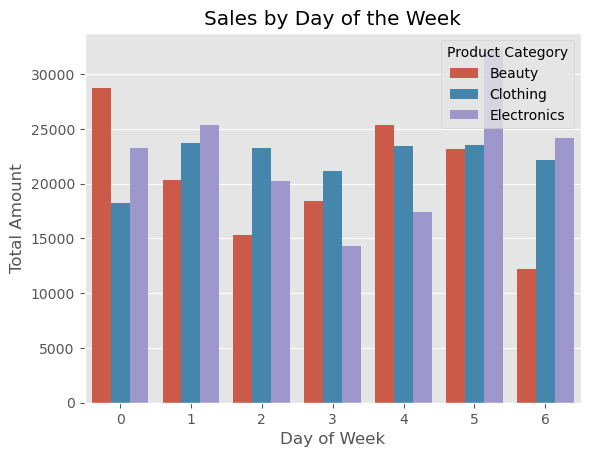

In [24]:
ax=sns.barplot(x='Day of Week',y='Total Amount', hue='Product Category',data=dow_sales)
ax.set_title('Sales by Day of the Week')

In [25]:
Monthly_sales=df.groupby(['Month','Product Category'])['Total Amount'].sum().reset_index()

Text(0.5, 1.0, 'Product Category Performance by Month')

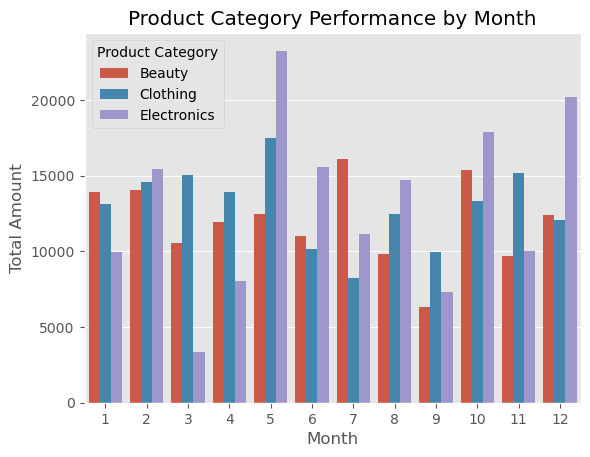

In [26]:
ax=sns.barplot(x='Month',y='Total Amount', hue='Product Category',data=Monthly_sales)
ax.set_title('Product Category Performance by Month')

In [27]:
df['Quarter of the Year']=(df['Date']).dt.quarter

In [28]:
Quarter_sales=df.groupby(['Quarter of the Year','Product Category'])['Total Amount'].sum().reset_index()

Text(0.5, 1.0, 'Product Category Performance by Year Quarter')

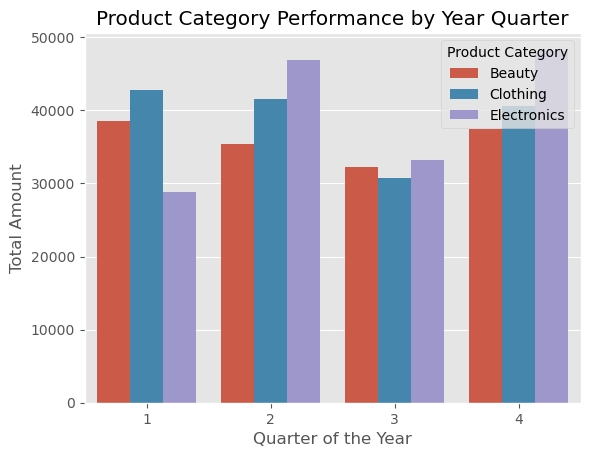

In [29]:
ax=sns.barplot(x='Quarter of the Year',y='Total Amount', hue='Product Category',data=Quarter_sales)
ax.set_title('Product Category Performance by Year Quarter')

In [30]:
sales_gender=df.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()

<Axes: xlabel='Gender', ylabel='Total Amount'>

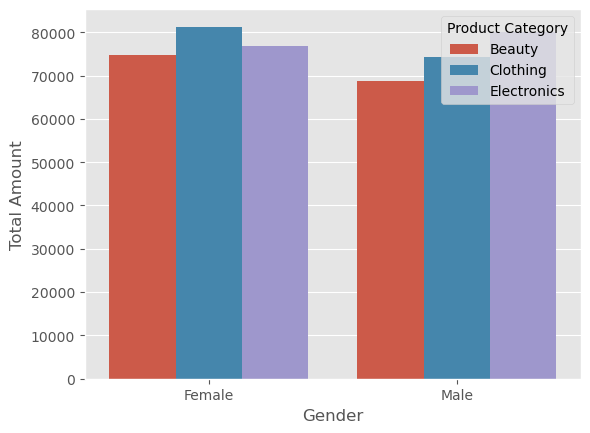

In [31]:
sns.barplot(x='Gender', y='Total Amount', hue = 'Product Category', data = sales_gender)

<Axes: >

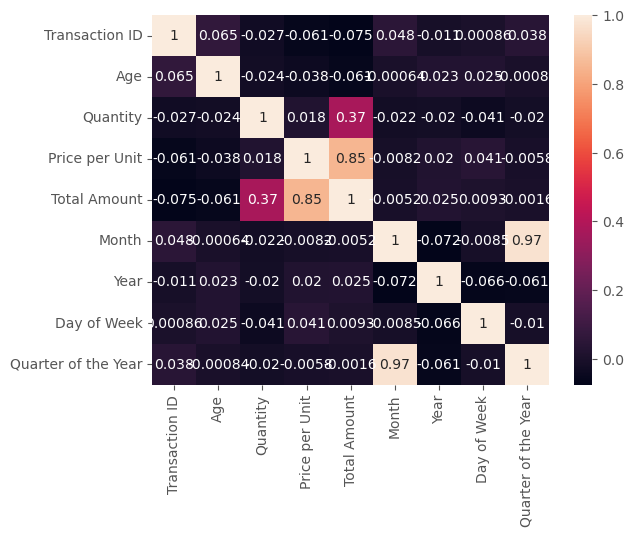

In [32]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [33]:
#Overall best Performaning Product
product=df.groupby(['Product Category'])['Total Amount'].sum().reset_index()

Text(0.5, 1.0, 'Product Performance')

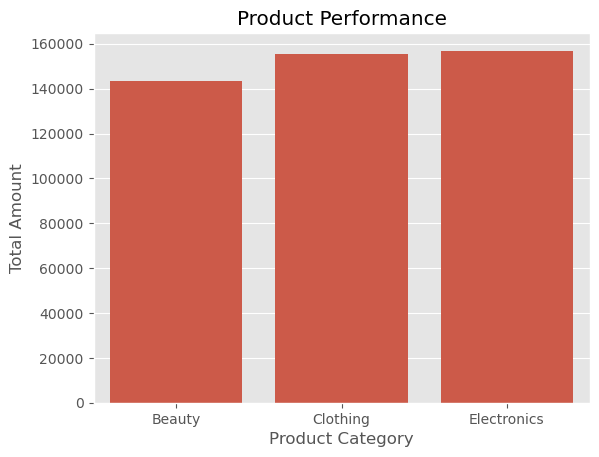

In [40]:
ax=sns.barplot(x='Product Category', y='Total Amount',data=product)
ax.set_title('Product Performance')

In [ ]:
## Recommendations
#-- Implement Customer Relationship Management (CRM) systems to manage and analyze customer interactions and data for groups that are less performing.
#-- Leverage social media, email marketing, and search engine optimization (SEO) to reach a wider audience especially for age group that are more inclined to digital channels.
#-- Engage in sales promotion strategies that captures the interest of each age group
#-- Provide discount based on Age group to boost sales target at those Age bracket that are not performing well.
#-- Offer personalized recommendations and experiences based on customer data.